## Notebook to analyze stablecoin metrics

This notebook provides some functions to visualize and analize the behavior of stablecoins

In [136]:
import san

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import statsmodels.formula.api as smf
import statsmodels.api as sm

Here we specify the stableoins we want to look at:

In [137]:
coin_list = ["tether", "usd-coin", "paxos-standard-token", "gemini-dollar", "nusd", "trueusd", 
             "dai", "ckusd", "bitusd"] # , "steem-dollars" removed because it moved extremely strong within the year

The following function accepts the list of coins and some specifications about the selected time and returns some descriptive statistics:

In [354]:
def calculate_sd(coinlist, from_date, to_date, interval):
    data = san.get("ohlcv/bitcoin", from_date=from_date, to_date=to_date, interval=interval)
    for coin in coinlist: # Download all the projects in the list
        project = san.get("ohlcv/" + coin, from_date=from_date, to_date=to_date, interval=interval)
        data[coin + "close"] = project.closePriceUsd
        data[coin + "close_change"] = project.closePriceUsd.pct_change()
        data[coin + "high"] = project.highPriceUsd
        data[coin + "low"] = project.lowPriceUsd
        data[coin + "volume"] = project.volume
        data[coin + "volume_change"] = project.volume.pct_change()

    standard_deviations = []
    all_days_above = []
    volume_mean = []

    for coin in coinlist:  # Iterate over the projects to collect standard deviations and count outliers
        days_above = sum(i > 1.05 for i in data[coin + "high"]) + sum(i < 0.95 for i in data[coin + "low"])
        sd = data[coin + "close_change"].std() * 100
        #print("The standard deviation for {} is {} percent".format(coin, round(sd, 4)), "with {} days over 1.05 or under 0.95".format(days_above))
        standard_deviations.append(sd)
        all_days_above.append(days_above)
        volume_mean.append(int(data[coin + "volume"].mean()))
    
    results = pd.DataFrame(standard_deviations,
                           columns=["standard_deviation_percent"], index=coin_list)
    results["outliers above 1.05 or below 0.95"] = all_days_above
    results["average daily volume"] = volume_mean
    
    display(results)
    
    print("Plotting the standard deviations of stablecoins for the last year:")
    #plt.boxplot(data=)
    plt.figure(figsize=(10, 5)) 
    plt.barh(coinlist, standard_deviations)
    plt.gca().set_xlim([0,2.6])
    plt.ylabel("stablecoins")
    plt.xlabel("daily standard deviation")
    plt.show()
    return data

Now let's execute our function:

(beware that some stablecoins only exist for a short time and therefore can only be analysed for that period)

,standard_deviation_percent,outliers above 1.05 or below 0.95,average daily volume
tether,0.394601,3,2742563518
usd-coin,0.505783,1,1593539
paxos-standard-token,0.642558,1,23382452
gemini-dollar,0.695926,4,2590611
nusd,0.763107,11,106483
trueusd,0.949821,7,11785356
dai,1.198680,28,3623593
ckusd,1.450638,52,122362102
bitusd,2.531675,99,575039


Plotting the standard deviations of stablecoins for the last year:


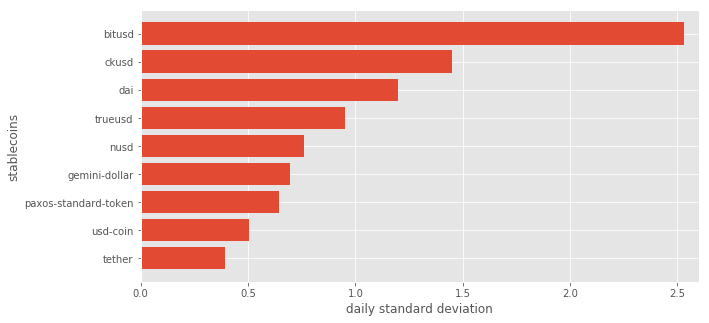

In [355]:
data = calculate_sd(coin_list, "2018-01-01", "2018-11-08", "1d");

How about a shorter time frame? Let's look at the results for one week:

,standard_deviation_percent,outliers above 1.05 or below 0.95,average daily volume
tether,0.598609,1,2654239110
usd-coin,0.449076,0,1929935
paxos-standard-token,1.014411,0,48457077
gemini-dollar,0.932422,1,4673166
nusd,0.735024,2,61947
trueusd,1.119276,0,24353398
dai,1.086330,2,4793461
ckusd,0.787420,0,144387950
bitusd,0.747310,0,77437


Plotting the standard deviations of stablecoins for the last year:


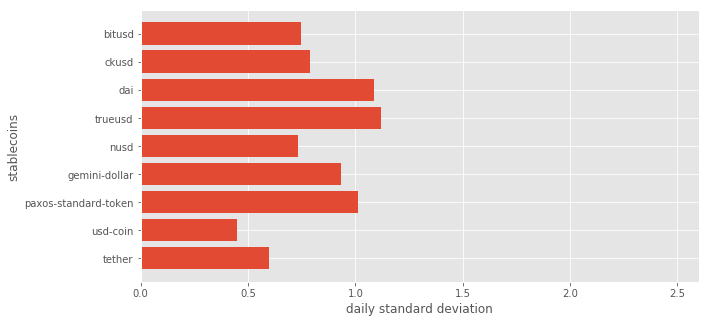

In [356]:
calculate_sd(coin_list, "2018-11-01", "2018-11-08", "1d");

Let's also create a function that displays boxplots for the prices:

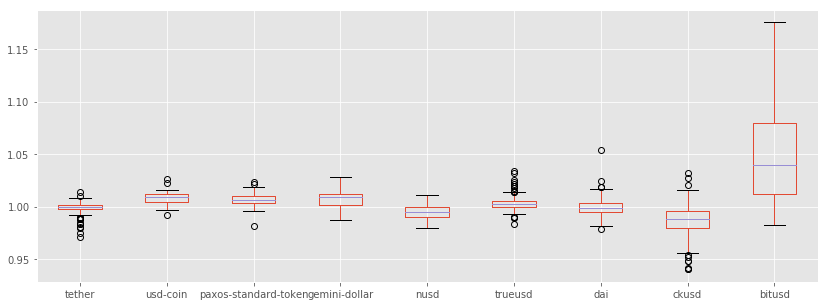

In [197]:
def do_boxplot(coinlist, from_date, to_date, interval):
    pricerange = pd.DataFrame()
    for coin in coinlist:
        price = san.get("ohlcv/" + coin, from_date=from_date, to_date=to_date, interval=interval).closePriceUsd
        pricerange[coin] = price
    
    plt.figure(figsize=(14, 5))
    pricerange.boxplot()
    plt.show()

    
do_boxplot(coin_list, "2018-01-01", "2018-11-06", "1d")

In [162]:
data.tail()

,openPriceUsd,closePriceUsd,highPriceUsd,lowPriceUsd,volume,marketcap,tetherclose,tetherclose_change,tetherhigh,tetherlow,...,ckusdhigh,ckusdlow,ckusdvolume,ckusdvolume_change,bitusdclose,bitusdclose_change,bitusdhigh,bitusdlow,bitusdvolume,bitusdvolume_change
datetime,,,,,,,,,,,,,,,,,,,,,
2018-11-01 00:00:00+00:00,6319.162887,6377.78,6547.140000,6311.830000,3789400000,1.107549e+11,0.991679,0.003442,1.016448,0.987329,...,1.036990,0.995124,104650000.0,0.182721,1.010007,0.009392,1.034340,0.996988,72077.0,-0.716256
2018-11-02 00:00:00+00:00,6379.505304,6388.44,6396.860252,6324.851064,4234870000,1.104961e+11,0.993217,0.001551,0.996308,0.977024,...,1.006958,0.993864,136737180.0,0.306614,1.000781,-0.009135,1.010007,0.997028,49787.0,-0.309253
2018-11-03 00:00:00+00:00,6384.789501,6361.26,6400.070000,6342.370000,3658640000,1.105626e+11,0.999432,0.006257,1.005739,0.993098,...,1.023280,1.001200,144078000.0,0.053686,0.994567,-0.006209,1.001274,0.994311,51001.0,0.024384
2018-11-04 00:00:00+00:00,6365.473018,6376.13,6389.260698,6294.570000,4390020000,1.102561e+11,0.988642,-0.010796,1.001563,0.945107,...,1.016600,0.978337,163009697.0,0.131399,0.988005,-0.006598,1.003662,0.986482,87722.0,0.720005
2018-11-05 00:00:00+00:00,6375.517587,6419.66,6482.283210,6363.620000,4174800000,1.116830e+11,0.993176,0.004586,1.007206,0.990898,...,1.014585,0.999589,153702000.0,-0.057099,0.999569,0.011704,1.005096,0.987099,145447.0,0.658045


Now let's look at the connection between the volatility and the volume of our stablecoins:

(Be aware that this code only works right if you have staked SAN-tokens an got an api-key. Otherwise there is a limit of the amount of data you can pull per request.)

,rsquared volume,rsquared market,rsquared combined model,beta volume,beta market,p-value volume,p-value market,p-value combined
tether,0.687889,0.419178,0.786135,0.028368,0.268809,0.000000,0.000000,"[0.000000, 0.000000]"
usd-coin,0.543923,0.871401,0.873446,0.011492,0.576379,0.000001,0.000000,"[0.484380, 0.000000]"
paxos-standard-token,0.206543,0.846186,0.855128,0.008059,0.582723,0.001712,0.000000,"[0.114881, 0.000000]"
gemini-dollar,0.458460,0.549527,0.549551,0.017136,0.986389,0.000006,0.000000,"[0.966718, 0.014406]"
nusd,0.019832,0.054679,0.058133,0.013861,1.457358,0.123393,0.009841,"[0.511918, 0.030451]"
trueusd,0.797595,0.351784,0.798111,0.055292,0.378098,0.000000,0.000000,"[0.000000, 0.427860]"
dai,0.161062,0.396975,0.407573,0.017621,0.516150,0.000000,0.000000,"[0.018958, 0.000000]"
ckusd,0.615831,0.797175,0.820788,0.166500,0.599857,0.000000,0.000000,"[0.000000, 0.000000]"
bitusd,0.027086,0.791379,0.801534,0.000293,1.428085,0.035214,0.000000,"[0.004654, 0.000000]"


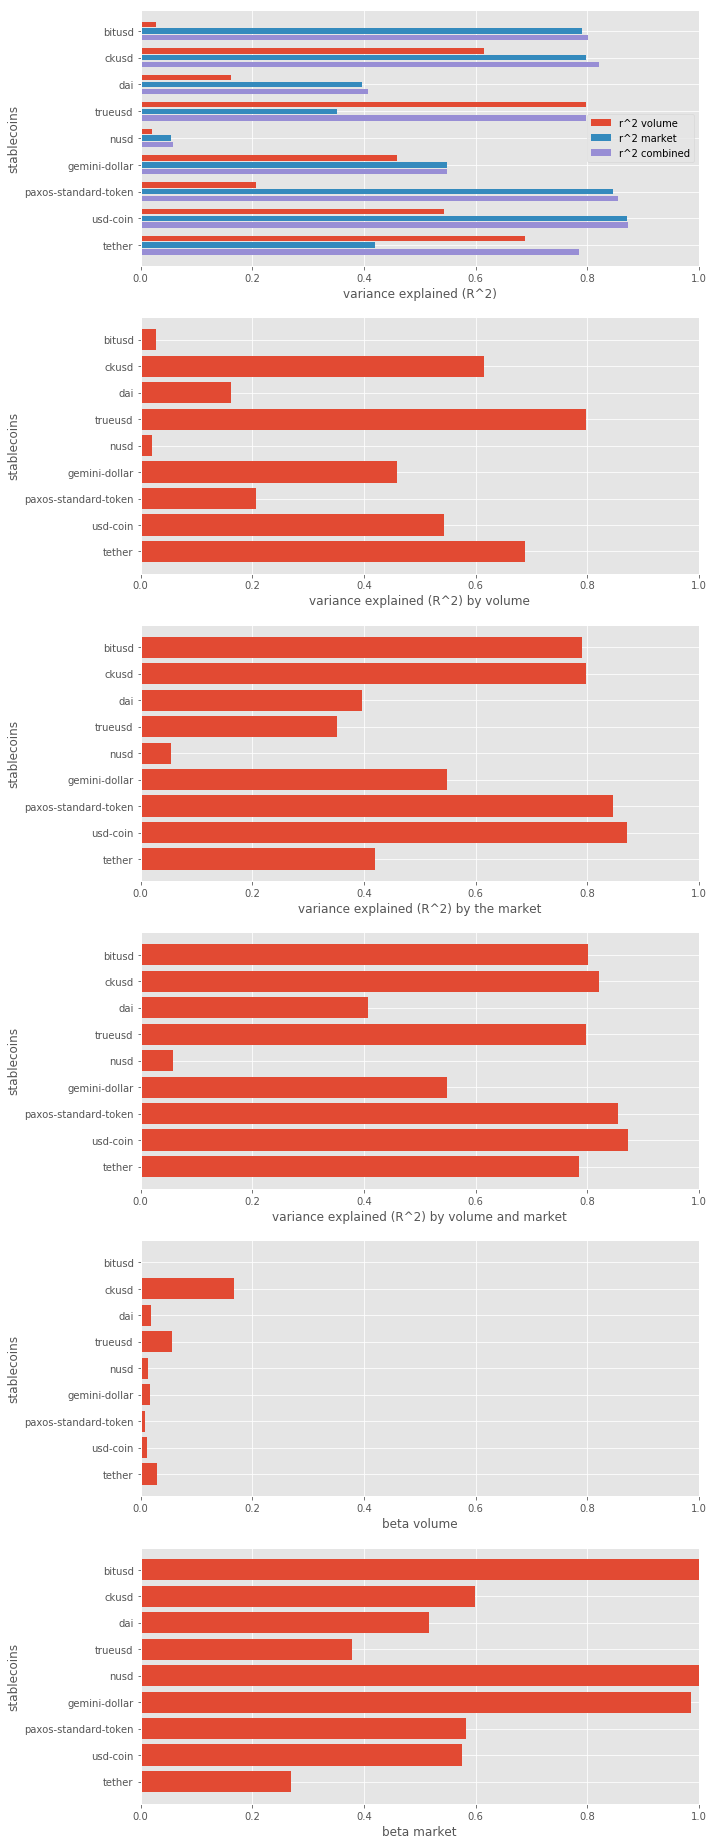

In [360]:
def calculate_rsquared(coinlist, from_date, to_date, interval):
    volume = san.get("ohlcv/bitcoin", from_date=from_date, to_date=to_date, interval=interval)
    volatility = san.get("ohlcv/bitcoin", from_date=from_date, to_date=to_date, interval=interval)
    volatility["bitcoin_change"] = volatility.closePriceUsd.pct_change()
    
    for coin in coinlist:
        project = san.get("prices/" + coin, from_date=from_date, to_date=to_date, interval=interval)
        volume[coin + "volume_change"] = project.volume.pct_change()
        volatility[coin + "volatility"] = project.priceUsd.pct_change()

    volume = volume.resample("1d").std()
    volatility = volatility.resample("1d").std()

    
    rsquared_volume = []
    beta_volume = []
    sig_volume = []
    
    rsquared_combined = []
    sig_combined = []
    
    rsquared_bench = []
    beta_bench = []
    sig_bench  = []
    
    for coin in coinlist:
        predictors = pd.DataFrame()
        predictors["volume"] = volume[coin + "volume_change"]
        predictors["market"] = volatility.bitcoin_change
        predictors = predictors.dropna()
        
        # Calculating the three models:
        model_volume = sm.OLS(volatility[coin + "volatility"].dropna(), predictors["volume"]).fit()
        model_benchmark = sm.OLS(volatility[coin + "volatility"].dropna(), predictors["market"]).fit()
        model_combined = sm.OLS(volatility[coin + "volatility"].dropna(), predictors).fit()
        
        rsquared_volume.append(model_volume.rsquared)
        rsquared_bench.append(model_benchmark.rsquared)
        rsquared_combined.append(model_combined.rsquared)
        beta_volume.append(model_volume.params[0])
        beta_bench.append(model_benchmark.params[0])
        sig_volume.append('{:f}'.format(model_volume.pvalues[0]))
        sig_bench.append('{:f}'.format(model_benchmark.pvalues[0]))
        sig_combined.append(['{:f}'.format(model_combined.pvalues[0]), 
                             '{:f}'.format(model_combined.pvalues[1])])
        #print(model_combined.summary())  # Here you could optionally display the complete results of all regression analyses
        
    # Pepare and display a table of our results:
    results = pd.DataFrame(rsquared_volume,
                           columns=["rsquared volume"], index=coin_list)
    results["rsquared market"] = rsquared_bench
    results["rsquared combined model"] = rsquared_combined
    
    results["beta volume"] = beta_volume
    results["beta market"] = beta_bench
    
    results["p-value volume"] = sig_volume
    results["p-value market"] = sig_bench
    results["p-value combined"] = sig_combined
    display(results)
    
    
    # Doing a lot of plotting:
    
    plt.figure(figsize=(10,33))
               
    plt.subplot(6, 1, 1) 
    plt.gca().set_xlim([0,1])
    pos = np.arange(len(coin_list))
    bar_width = 0.2
    plt.barh(pos + bar_width + 0.05, rsquared_volume, bar_width, label="r^2 volume")
    plt.barh(pos , rsquared_bench, bar_width, label="r^2 market")
    plt.barh(pos - bar_width - 0.05, rsquared_combined, bar_width, label="r^2 combined")
    plt.yticks(pos, coin_list)
    plt.xlabel("variance explained (R^2)")
    plt.ylabel("stablecoins")
    plt.legend()
    
    plt.subplot(6, 1, 2)
    plt.gca().set_xlim([0,1])
    plt.barh(coin_list, rsquared_volume)
    plt.xlabel("variance explained (R^2) by volume")
    plt.ylabel("stablecoins")
    
    plt.subplot(6, 1, 3)
    plt.gca().set_xlim([0,1])
    plt.barh(coin_list, rsquared_bench)
    plt.xlabel("variance explained (R^2) by the market")
    plt.ylabel("stablecoins")
    
    plt.subplot(6, 1, 4)
    plt.gca().set_xlim([0,1])
    plt.barh(coin_list, rsquared_combined)
    plt.xlabel("variance explained (R^2) by volume and market")
    plt.ylabel("stablecoins")
    
    plt.subplot(6, 1, 5)
    plt.gca().set_xlim([0,1])
    plt.barh(coin_list, beta_volume)
    plt.xlabel("beta volume")
    plt.ylabel("stablecoins")
    
    plt.subplot(6, 1, 6)
    plt.gca().set_xlim([0,1])
    plt.barh(coin_list, beta_bench)
    plt.xlabel("beta market")
    plt.ylabel("stablecoins")
    
    
calculate_rsquared(coin_list, "2018-01-01", "2018-11-10", "1h");